# Stock Prices Prediction System

# Objectives
1. To find out how far into the future you can predict stock prices for your three chosen stocks.
2. To make sure model can do a prediction score above 70%.


# Solution
In this model, we have considered understanding and working on stocks for -   
- **Tesla** 
- **JP Morgan**
- **Goldman Sachs** 

	
Many factors are involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects make share prices volatile and very difficult to predict with a high degree of accuracy.

We will work with historical data about the stock prices of the above companies and predict these companies' future stock prices using Random Forest Algorithm.
 

<center> <h1> Tesla Stock Price Prediction </center></h1>

## 1. Installing packages for importing Stock prices

Pandas Datareader is a Python package that allows us to create a pandas DataFrame object by using various data sources from the internet. It is popularly used for working with realtime stock price datasets. 

In [1]:
!pip install pandas_datareader

In [2]:
!pip install pandas-datareader --upgrade

## 2. Importing and fetching data from web

For Tesla stock we will be fetching Tesla stock prices from 01-01-2020 to 10-13-2021 from yahoo finance

In [3]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 10, 12)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
#tesla.head(10)
tesla.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000


<AxesSubplot:xlabel='Date'>

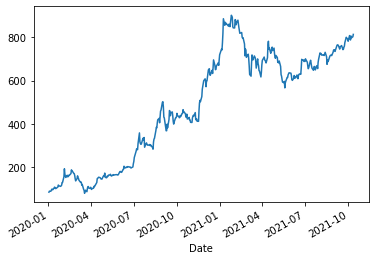

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

vol = tesla['High']
vol.plot()

<AxesSubplot:xlabel='Date'>

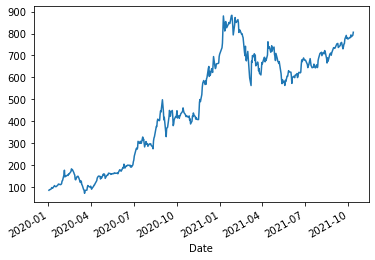

In [5]:
close = tesla['Close']
close.plot()

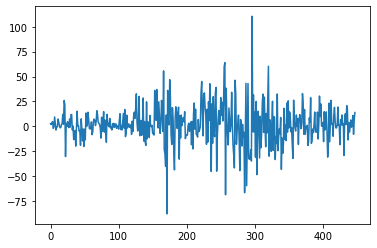

In [6]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

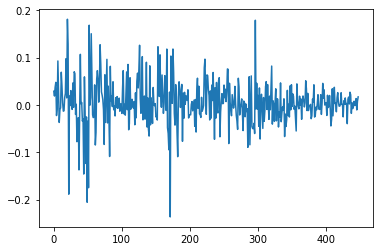

In [7]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [8]:
vol.corr(close)
# a value of 0.3 essentially means little correlation..

0.9991923667848998

In [9]:
tesla.to_csv('tesla.csv')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('tesla.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000


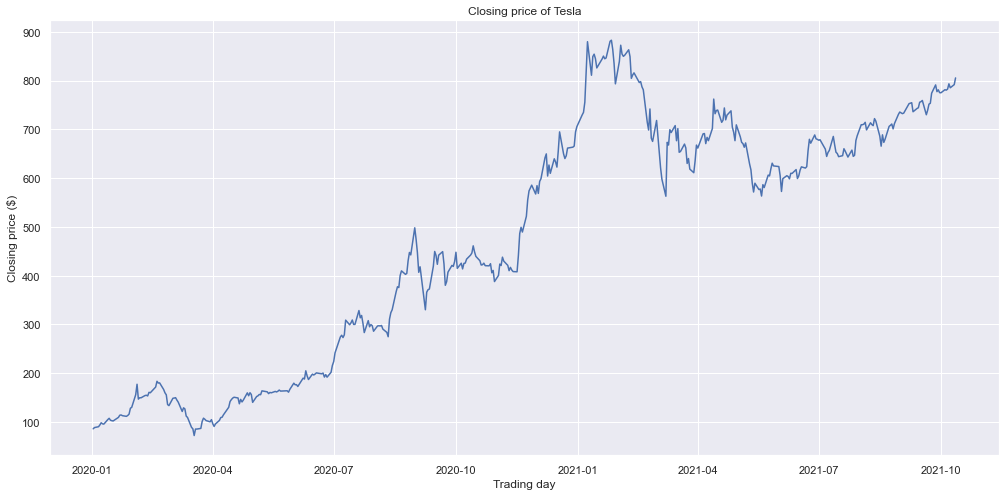

In [11]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of Tesla')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)

## 3. Time Series Exploratory Data Analysis
### a. Is it Stationary?

Stationarity is a critical characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has a constant mean and variance, and covariance is independent of time. We'll study what these concepts represent when we get into statistics. For now, think of them as point estimates of a distribution of numbers. Most often, stock prices are not a stationary process since we might see a growing trend, or its volatility might increase over time

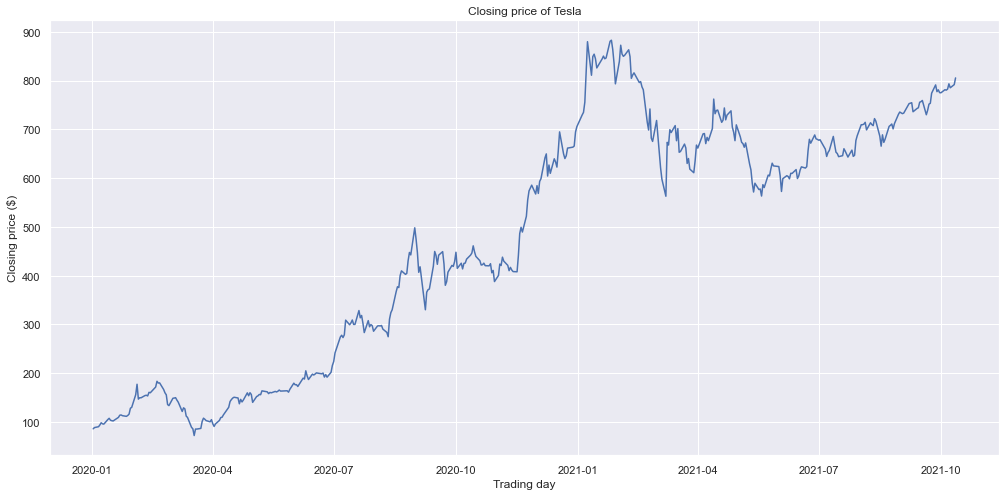

In [12]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(tesla.Close)
plt.title('Closing price of Tesla')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some
kind of seasonality.

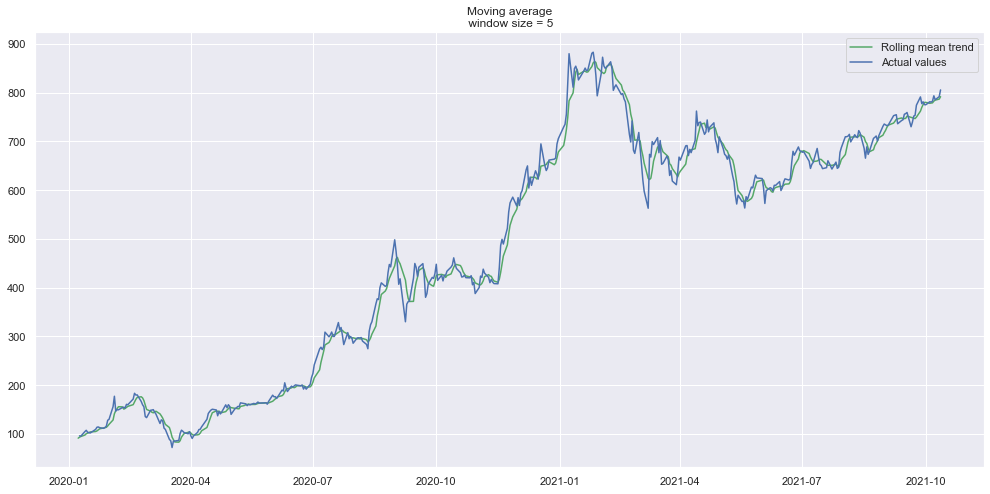

In [13]:
from sklearn.metrics import mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(tesla.Close, 5)

### b. Moving average

The **moving average** model states that the next observation is the **mean** of all past observations -in a specific window-.

Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series and highlight different trends.


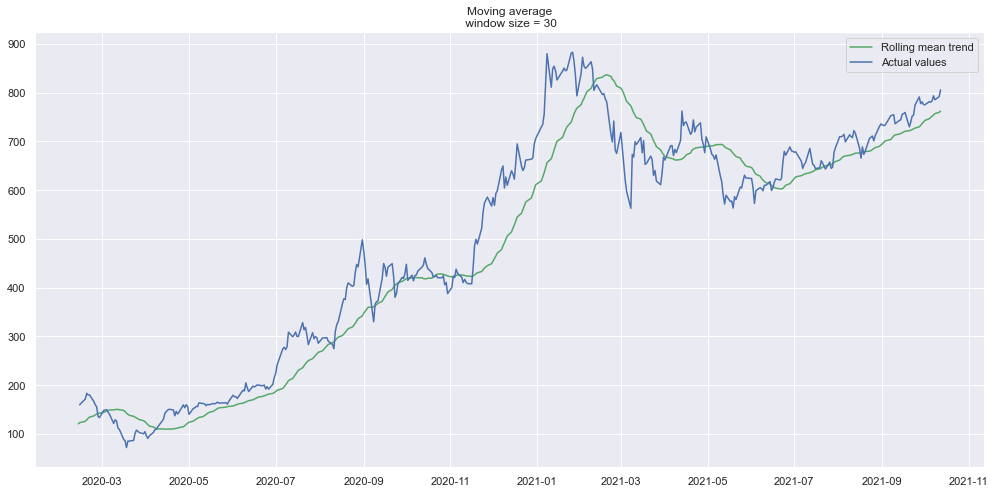

In [14]:
#Smooth by the previous month (30 days)
plot_moving_average(tesla.Close, 30)

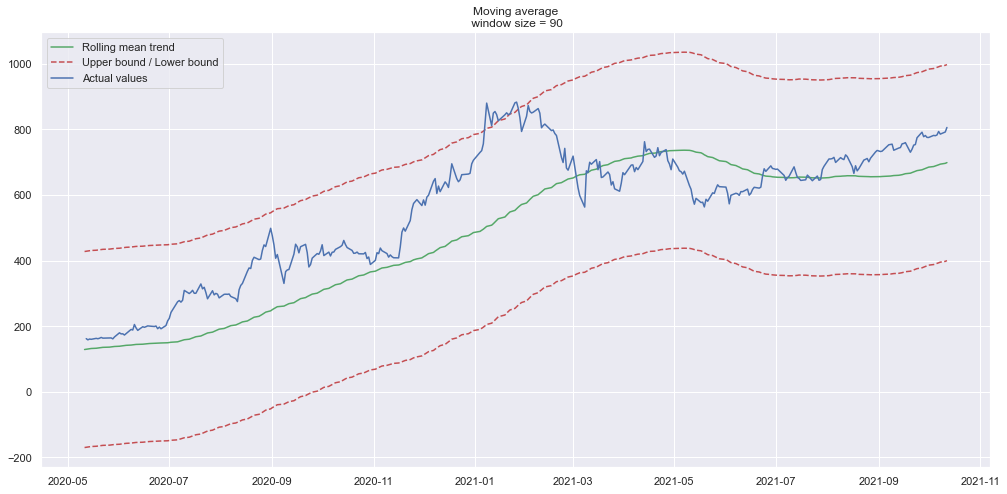

In [15]:

#Smooth by previous quarter (90 days)
plot_moving_average(tesla.Close, 90, plot_intervals=True)

### c.  Exponential Model

**Exponential smoothing** uses a similar logic to moving average, but this time, a different
decreasing weight is assigned to each observations. In other words, less importance is
given to observations as we move further from the present (very old observations become less important).

**Double exponential smoothing** is used when there is a trend in the time series. In that
case, we use this technique, which is simply a recursive use of exponential smoothing
twice.

**Triple exponential smoothing** extends double exponential smoothing, by adding a seasonal smoothing
factor. Of course, this is useful if you notice seasonality in your time series.

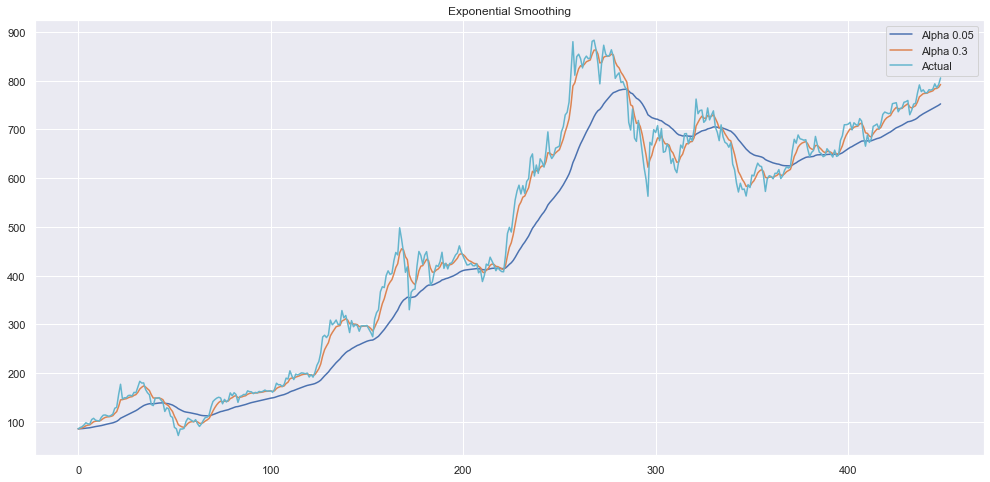

In [16]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(tesla.Close, [0.05, 0.3])

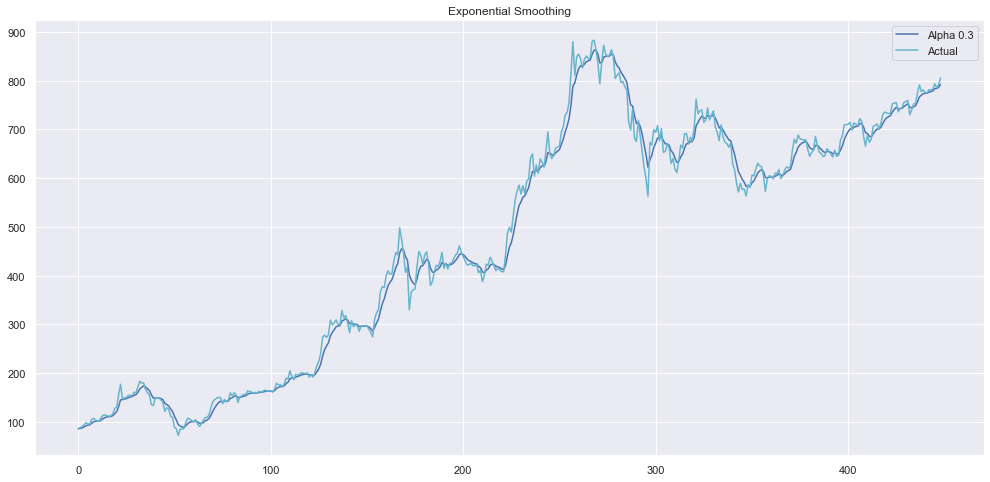

In [17]:
plot_exponential_smoothing(tesla.Close, [0.3])

We must turn our series into a **stationary process** in order to model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process. The Dickey-Fuller test is a point estimate, when it is tiny (say less than 0.01), we can safely say that the time series is stationary. Otherwise, *not*.

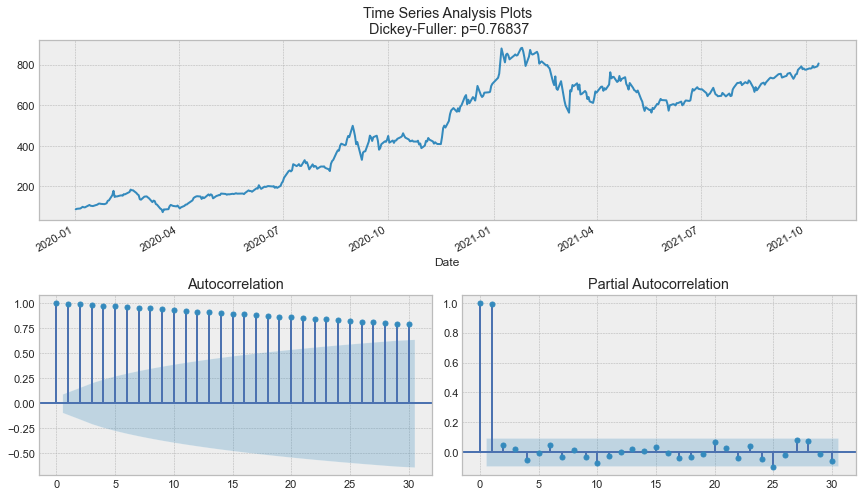

In [18]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(tesla.Close, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

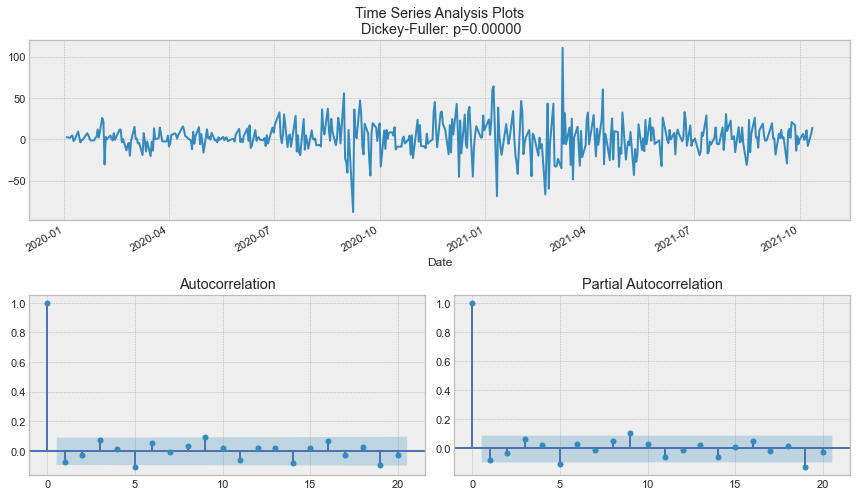

In [19]:
# Take the first difference to remove to make the process stationary
data_diff = tesla.Close - tesla.Close.shift(1)

tsplot(data_diff[1:], lags=20)

Our series is now stationary and we can start modelling!

## 4. Accuracy Predication using- Random Forest Model for Tesla

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
print(tesla.columns)
print(tesla.shape)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
(449, 6)


In [22]:
 # Shift close down to predict next day
pd.concat([tesla.High, tesla.Close.shift(-150)], axis=1)

,High,Close
Date,,
2020-01-02,86.139999,297.915985
2020-01-03,90.800003,290.541992
2020-01-06,90.311996,283.713989
2020-01-07,94.325996,274.877991
2020-01-08,99.697998,310.951996
...,...,...
2021-10-06,786.659973,NaN
2021-10-07,805.000000,NaN
2021-10-08,796.380005,NaN


In [23]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
     return 'Close' not in col
dummy = tesla.dropna()


# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
tesla_X = tesla[[x for x in tesla.columns if valid(x)]].iloc[:-150]

# for the dependent variable, we remove the NA, so that removes the last row, too
tesla_y = tesla.Close.shift(-150).dropna()

In [24]:
tesla_X.T

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2021-02-25,2021-02-26,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-08,2021-03-09,2021-03-10
High,8.614000e+01,9.080000e+01,9.031200e+01,9.432600e+01,9.969800e+01,9.976000e+01,9.698800e+01,1.051260e+02,1.094820e+02,1.075680e+02,...,7.372100e+02,7.067000e+02,7.190000e+02,7.211100e+02,7.007000e+02,6.684500e+02,6.278400e+02,6.201300e+02,6.780900e+02,7.178500e+02
Low,8.434200e+01,8.738400e+01,8.800000e+01,9.067200e+01,9.364600e+01,9.457400e+01,9.474000e+01,9.840000e+01,1.049800e+02,1.033580e+02,...,6.705800e+02,6.595100e+02,6.850500e+02,6.850000e+02,6.517100e+02,6.000000e+02,5.394900e+02,5.587900e+02,5.952100e+02,6.550600e+02
Open,8.490000e+01,8.810000e+01,8.809400e+01,9.228000e+01,9.474000e+01,9.942000e+01,9.635800e+01,9.870000e+01,1.088520e+02,1.059520e+02,...,7.261500e+02,7.000000e+02,6.901100e+02,7.182800e+02,6.879900e+02,6.558000e+02,6.260600e+02,6.005500e+02,6.081800e+02,7.003000e+02
Volume,4.766050e+07,8.889250e+07,5.066500e+07,8.941050e+07,1.557215e+08,1.422020e+08,6.479750e+07,1.325880e+08,1.449810e+08,8.684400e+07,...,3.902390e+07,4.108920e+07,2.713620e+07,2.373220e+07,3.020800e+07,6.591950e+07,8.939650e+07,5.178700e+07,6.752330e+07,6.060570e+07


In [25]:
tesla_y

Date
2020-01-02    297.915985
2020-01-03    290.541992
2020-01-06    283.713989
2020-01-07    274.877991
2020-01-08    310.951996
                 ...    
2021-03-04    782.750000
2021-03-05    793.609985
2021-03-08    785.489990
2021-03-09    791.940002
2021-03-10    805.719971
Name: Close, Length: 299, dtype: float64

In [26]:
tesla_X_train, tesla_X_test, tesla_y_train, tesla_y_test = train_test_split(tesla_X, tesla_y, random_state=42)

In [27]:
# Create a model 
tesla_rf_model = RandomForestRegressor()

In [28]:
# Train the model
tesla_rf_model.fit(tesla_X_train, tesla_y_train)

RandomForestRegressor()

In [29]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
tesla_rf_model.score(tesla_X_test, tesla_y_test)

0.770655801974798

In [30]:
tesla_y_pred = tesla_rf_model.predict(tesla_X_test)

In [31]:
type(tesla_y_pred)

numpy.ndarray

In [32]:
tesla_y_pred[0:10]

array([735.9223999 , 729.17059631, 671.58359741, 408.19989716,
       492.31489716, 738.80909607, 606.00189697, 769.83370636,
       402.12583771, 700.23940552])

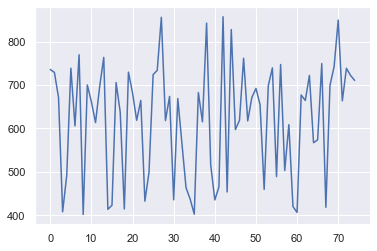

In [33]:
import matplotlib.pyplot as plt
plt.plot(tesla_y_pred)

In [34]:
type(tesla_y_test)

pandas.core.series.Series

In [35]:
tesla_y_test2 = tesla_y_test.values
type(tesla_y_test2)

numpy.ndarray

In [36]:
tesla_y_test2[0:10]

array([759.48999023, 711.20001221, 661.75      , 375.70599365,
       555.38000488, 744.48999023, 655.90002441, 849.44000244,
       324.20001221, 738.84997559])

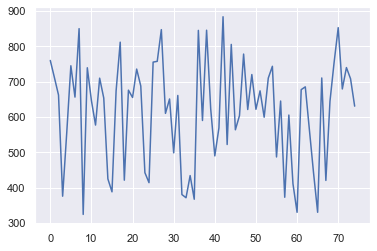

In [37]:
import matplotlib.pyplot as plt
plt.plot(tesla_y_test2)

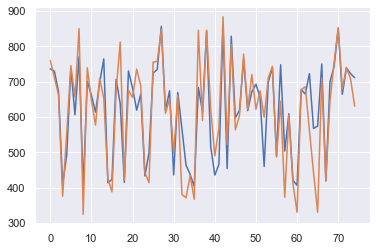

In [38]:
import matplotlib.pyplot as plt
plt.plot(tesla_y_pred)
plt.plot(tesla_y_test2)

In [39]:
pd.concat([pd.Series(tesla_y_pred), tesla_y_test.reset_index(drop=True)], axis=1)

,0,Close
0,735.922400,759.489990
1,729.170596,711.200012
2,671.583597,661.750000
3,408.199897,375.705994
4,492.314897,555.380005
...,...,...
70,849.611892,852.229980
71,663.744706,678.900024
72,738.690204,739.380005
73,722.144404,707.820007


Below we can also view how important is each feature based on the model prediction for feature importance of each column

In [40]:
sorted(zip(tesla_X.columns, tesla_rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Low', 0.6502630063972765),
 ('High', 0.14889166000987697),
 ('Open', 0.1280747261449295),
 ('Volume', 0.07277060744791701)]

# Conclusion for Tesla
Since we are targeting to achieve accuracy of more than 70% percent and see how far we can predict the data, we have tried below iterations for tesla stock
- For 30 days advance prediction , we received an score of around 95.34%
- For 90 days advance prediction , we received an score of around 86.37%
- For 110 days advance prediction , we received an score of around 85.98%
- For 150 days advance prediction , we received an score of around 77.06%

After this point, we are observing the predictions are affecting drastically low as we are using data for 1.5 years approx with 449 rows. Ths is due to the stock prices are affected based on the current trends and utlitzing the too old data might not relevant for the current trends in the market due to which stock prices flutuate. 

**So for Tesla stock, we were able to predict results of 150 days with accuracy more than 70%**

<center> <h1> Goldman Sachs Stock Price Prediction </center></h1>

## 2. Importing and fetching data from web

For Tesla stock we will be fetching Goldman Sachs stock prices from 01-01-2020 to 10-13-2021 from yahoo finance to keep it similar to Tesla to understand how far we can predict this stock

In [41]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 10, 12)
gs = web.DataReader('GS', 'yahoo', start, end)
gs = web.DataReader('GS', 'yahoo', start, end)
#gs.head(10)
gs.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,234.639999,230.160004,231.000000,234.320007,3736300.0,226.048447
2020-01-03,232.610001,230.300003,231.600006,231.580002,2274500.0,223.405151
2020-01-06,234.020004,229.490005,229.929993,233.949997,3329300.0,225.691483
2020-01-07,237.770004,234.759995,235.000000,235.490005,5255200.0,227.177139
2020-01-08,239.750000,235.479996,235.679993,237.759995,3564700.0,229.367004
2020-01-09,243.399994,239.820007,241.339996,242.600006,3980700.0,234.036148
2020-01-10,243.389999,241.389999,242.750000,242.110001,2248100.0,233.563461
2020-01-13,246.110001,243.000000,244.440002,245.210007,3359200.0,236.554031
2020-01-14,248.520004,244.600006,245.320007,245.660004,4302800.0,236.988113


<AxesSubplot:xlabel='Date'>

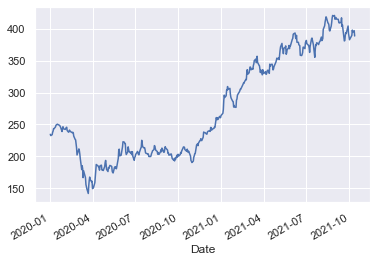

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

vol = gs['High']
vol.plot()

<AxesSubplot:xlabel='Date'>

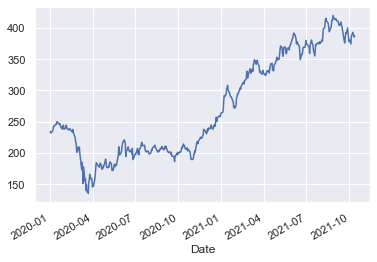

In [43]:
close = gs['Close']
close.plot()

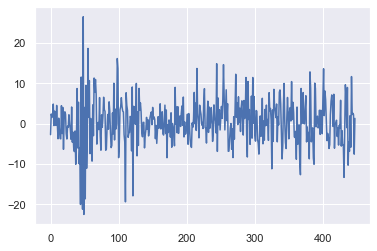

In [44]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

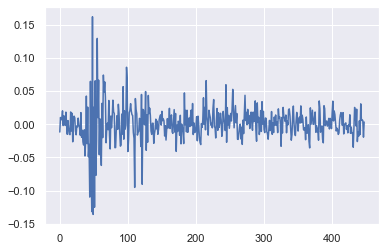

In [45]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [46]:
vol.corr(close)

0.99930992479195

In [47]:
gs.to_csv('gs.csv')

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('gs.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,234.639999,230.160004,231.000000,234.320007,3736300.0,226.048447
2020-01-03,232.610001,230.300003,231.600006,231.580002,2274500.0,223.405151
2020-01-06,234.020004,229.490005,229.929993,233.949997,3329300.0,225.691483
2020-01-07,237.770004,234.759995,235.000000,235.490005,5255200.0,227.177139
2020-01-08,239.750000,235.479996,235.679993,237.759995,3564700.0,229.367004
2020-01-09,243.399994,239.820007,241.339996,242.600006,3980700.0,234.036148
2020-01-10,243.389999,241.389999,242.750000,242.110001,2248100.0,233.563461
2020-01-13,246.110001,243.000000,244.440002,245.210007,3359200.0,236.554031
2020-01-14,248.520004,244.600006,245.320007,245.660004,4302800.0,236.988113


## 3. Time Series Exploratory Data Analysis
### a. Is it Stationary?

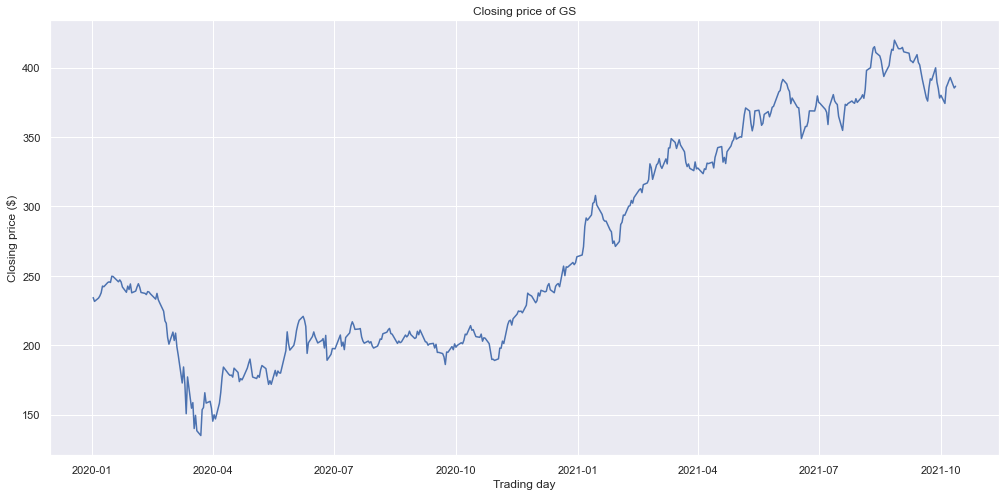

In [49]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of GS')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some
kind of seasonality.

### b. Moving average


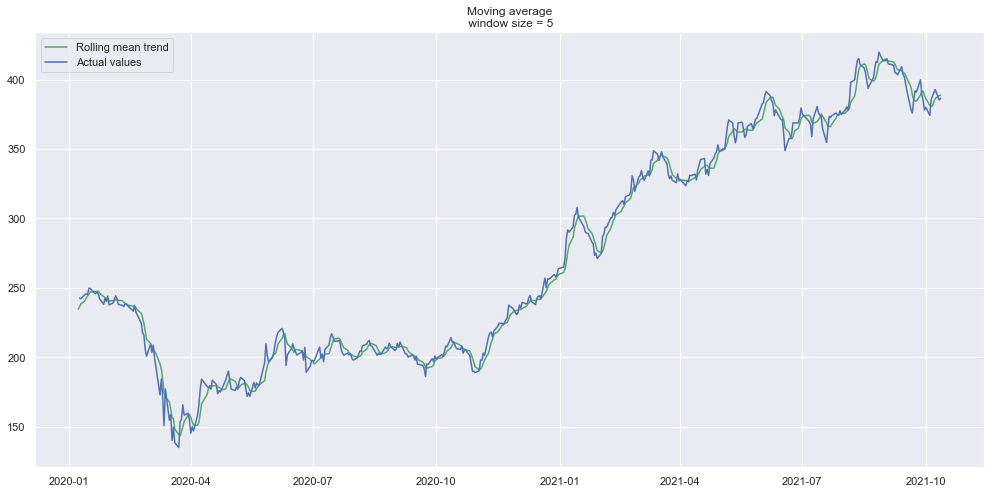

In [50]:
from sklearn.metrics import mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(gs.Close, 5)

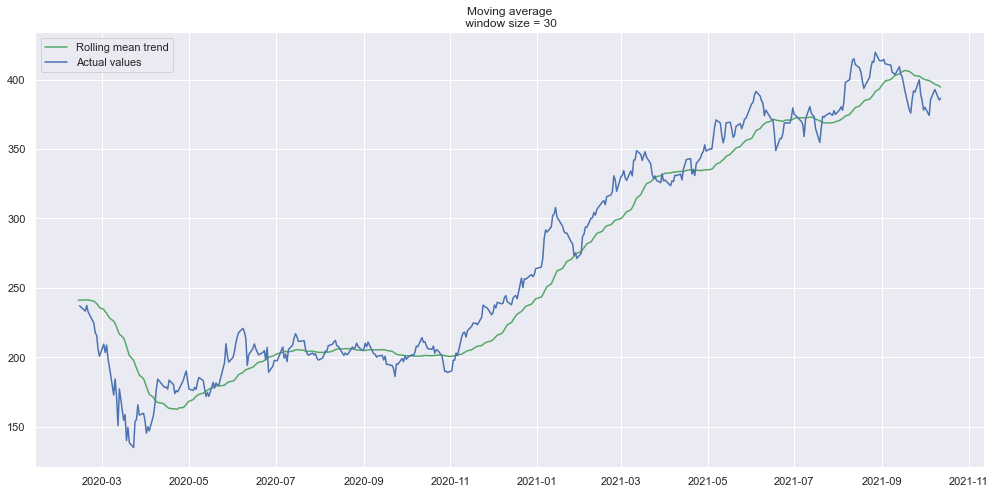

In [51]:
#Smooth by the previous month (30 days)
plot_moving_average(gs.Close, 30)

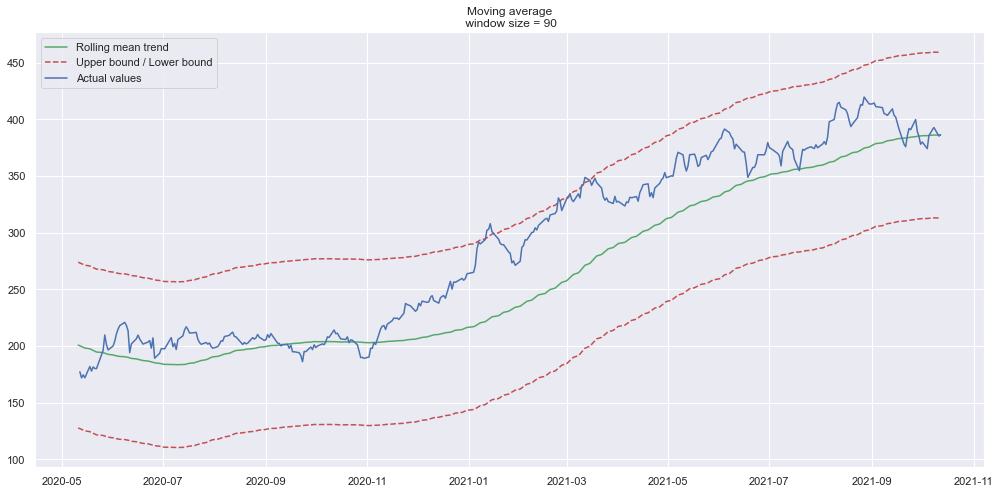

In [52]:
#Smooth by previous quarter (90 days)
plot_moving_average(gs.Close, 90, plot_intervals=True)

### c.  Exponential Model


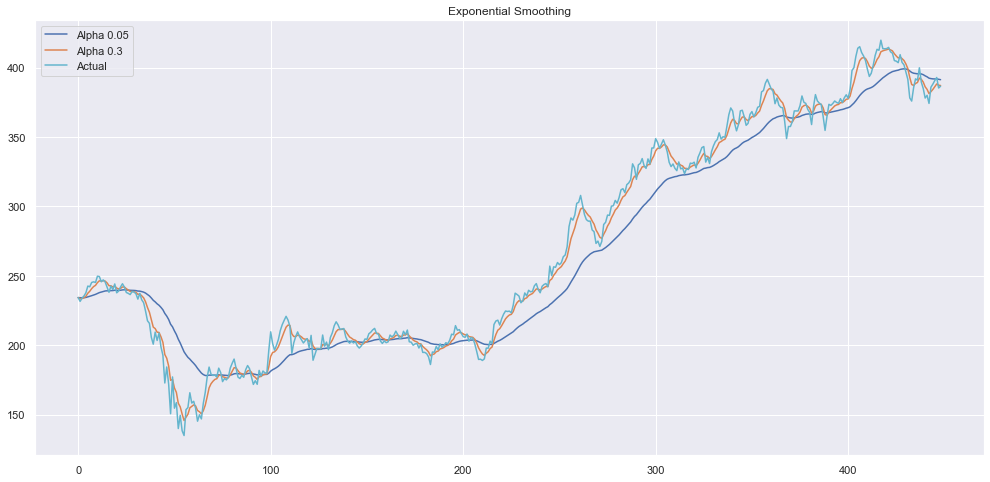

In [53]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(gs.Close, [0.05, 0.3])

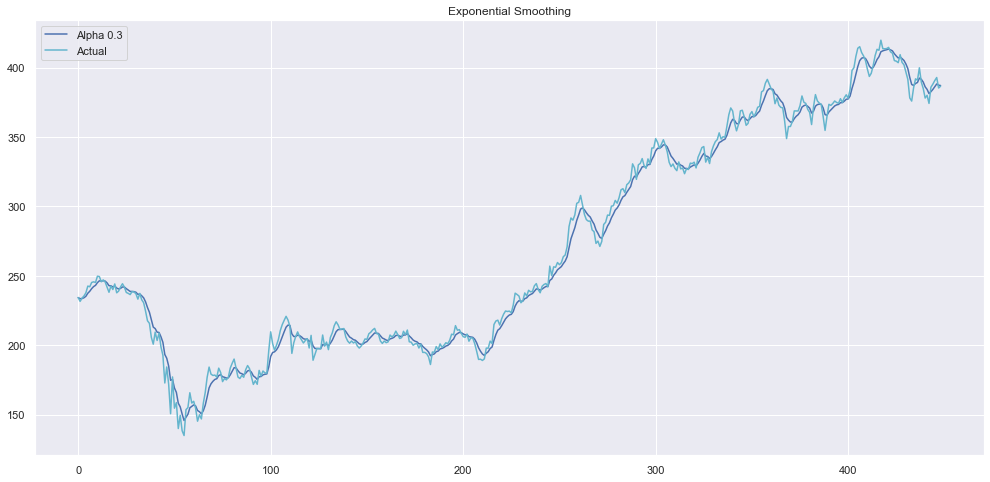

In [54]:
plot_exponential_smoothing(gs.Close, [0.3])

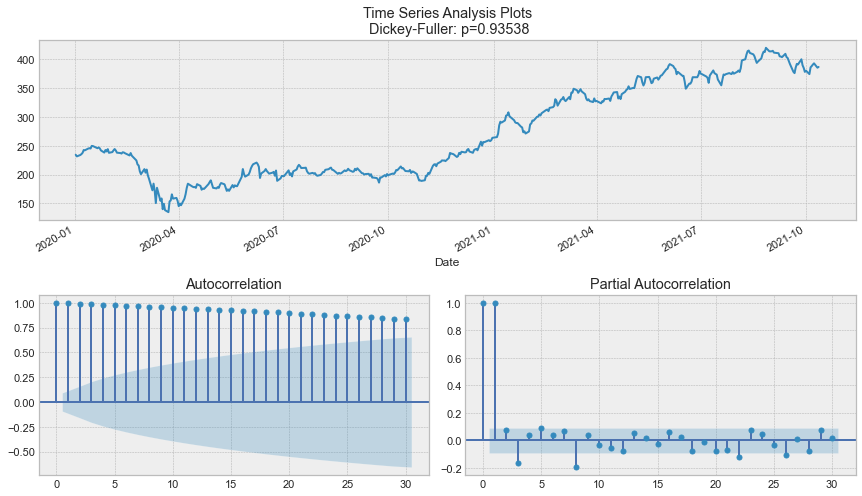

In [55]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(gs.Close, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

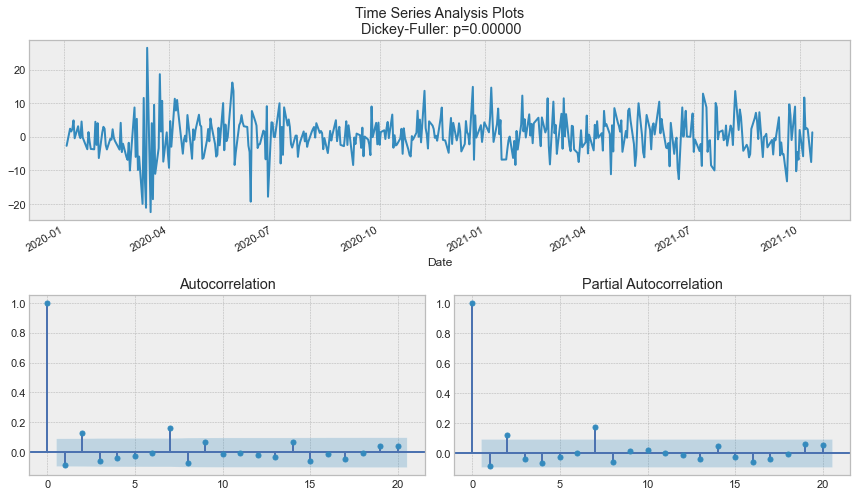

In [56]:
# Take the first difference to remove to make the process stationary
data_diff = gs.Close - gs.Close.shift(1)

tsplot(data_diff[1:], lags=20)

Our series is now stationary and we can start modelling!

## 4. Accuracy Predication using- Random Forest Model for GS

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [58]:
print(gs.columns)
print(gs.shape)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
(449, 6)


In [59]:
 # Shift close down to predict next day
pd.concat([gs.High, gs.Close.shift(-90)], axis=1)

,High,Close
Date,,
2020-01-02,234.639999,177.210007
2020-01-03,232.610001,171.800003
2020-01-06,234.020004,174.449997
2020-01-07,237.770004,171.869995
2020-01-08,239.750000,181.880005
...,...,...
2021-10-06,389.549988,NaN
2021-10-07,397.850006,NaN
2021-10-08,394.309998,NaN


In [60]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
     return 'Close' not in col
dummy = gs.dropna()


# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
gs_X = gs[[x for x in gs.columns if valid(x)]].iloc[:-90]

# for the dependent variable, we remove the NA, so that removes the last row, too
gs_y = gs.Close.shift(-90).dropna()

In [61]:
gs_X.T

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-06-01,2021-06-02,2021-06-03,2021-06-04
High,2.346400e+02,2.326100e+02,2.340200e+02,2.377700e+02,2.397500e+02,2.434000e+02,2.433900e+02,2.461100e+02,2.485200e+02,2.495000e+02,...,3.671400e+02,3.697200e+02,3.737700e+02,3.687900e+02,3.735500e+02,3.730700e+02,3.833600e+02,3.846700e+02,3.912500e+02,3.920500e+02
Low,2.301600e+02,2.303000e+02,2.294900e+02,2.347600e+02,2.354800e+02,2.398200e+02,2.413900e+02,2.430000e+02,2.446000e+02,2.391600e+02,...,3.605100e+02,3.655100e+02,3.640900e+02,3.619100e+02,3.673000e+02,3.682600e+02,3.763100e+02,3.793700e+02,3.801300e+02,3.863200e+02
Open,2.310000e+02,2.316000e+02,2.299300e+02,2.350000e+02,2.356800e+02,2.413400e+02,2.427500e+02,2.444400e+02,2.453200e+02,2.420000e+02,...,3.614900e+02,3.673200e+02,3.699100e+02,3.650000e+02,3.713300e+02,3.720000e+02,3.777000e+02,3.833300e+02,3.822500e+02,3.896800e+02
Volume,3.736300e+06,2.274500e+06,3.329300e+06,5.255200e+06,3.564700e+06,3.980700e+06,2.248100e+06,3.359200e+06,4.302800e+06,5.411200e+06,...,2.657500e+06,1.834300e+06,2.631000e+06,2.121200e+06,3.897000e+06,2.169700e+06,3.644000e+06,2.809700e+06,3.003900e+06,2.514100e+06


In [62]:
gs_y

Date
2020-01-02    177.210007
2020-01-03    171.800003
2020-01-06    174.449997
2020-01-07    171.869995
2020-01-08    181.880005
                 ...    
2021-05-28    388.049988
2021-06-01    390.619995
2021-06-02    392.809998
2021-06-03    385.239990
2021-06-04    386.529999
Name: Close, Length: 359, dtype: float64

In [63]:
gs_X_train, gs_X_test, gs_y_train, gs_y_test = train_test_split(gs_X, gs_y, random_state=42)

In [64]:
# Create a model 
gs_rf_model = RandomForestRegressor()

In [65]:
# Train the model
gs_rf_model.fit(gs_X_train, gs_y_train)

RandomForestRegressor()

In [66]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
gs_rf_model.score(gs_X_test, gs_y_test)

0.7472364902306652

In [67]:
gs_y_pred = gs_rf_model.predict(gs_X_test)

In [68]:
type(gs_y_pred)

numpy.ndarray

In [69]:
gs_y_pred[0:10]

array([285.77460281, 262.95989639, 370.32209625, 385.78029633,
       204.08080017, 378.34460449, 322.33410233, 207.57480362,
       360.80579987, 281.65590057])

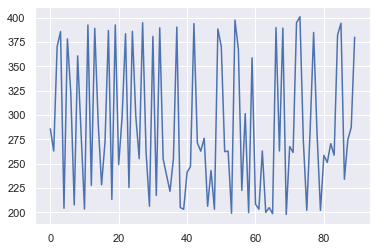

In [70]:
import matplotlib.pyplot as plt
plt.plot(gs_y_pred)

In [71]:
type(gs_y_test)

pandas.core.series.Series

In [72]:
gs_y_test2 = gs_y_test.values
type(gs_y_test2)

numpy.ndarray

In [73]:
gs_y_test2[0:10]

array([327.64001465, 208.88000488, 372.61999512, 374.04998779,
       197.96000671, 373.94000244, 210.57000732, 199.38999939,
       365.97000122, 202.96000671])

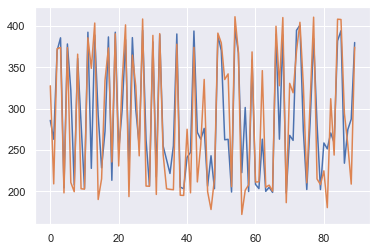

In [74]:
import matplotlib.pyplot as plt
plt.plot(gs_y_pred)
plt.plot(gs_y_test2)

In [75]:
pd.concat([pd.Series(gs_y_pred), gs_y_test.reset_index(drop=True)], axis=1)

,0,Close
0,285.774603,327.640015
1,262.959896,208.880005
2,370.322096,372.619995
3,385.780296,374.049988
4,204.080800,197.960007
...,...,...
85,394.319402,407.970001
86,233.896300,294.200012
87,274.623902,256.160004
88,287.280598,208.600006


Below we can also view how important is each feature based on the model prediction for feature importance of each column

In [76]:
sorted(zip(gs_X.columns, gs_rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Open', 0.324313258063333),
 ('Low', 0.3119342222198518),
 ('High', 0.25863704504027285),
 ('Volume', 0.10511547467654235)]

# Conclusion for GS
Since we are targeting to achieve accuracy of more than 70% percent and see how far we can predict the data, we have tried below iterations for GS stock
- For 30 days advance prediction , we received an score of around 89.12%
- For 90 days advance prediction , we received an score of around 74.72%

After this point, we are observing the predictions are affecting drastically low as we are using data for 1.5 years approx with 449 rows. Ths is due to the stock prices are affected based on the current trends and utlitzing the too old data might not relevant for the current trends in the market due to which stock prices flutuate. 

**So for GS stock, we were able to predict results of 90 days with accuracy more than 70%**

<center> <h1> JP Morgan Chase Stock Price Prediction </center></h1>

## 2. Importing and fetching data from web

For Tesla stock we will be fetching JP Morgan Chase stock prices from 01-01-2020 to 10-13-2021 from yahoo finance to keep it similar to other stocks to understand how far we can predict this stock

In [77]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 10, 12)
jpm = web.DataReader('JPM', 'yahoo', start, end)
jpm = web.DataReader('JPM', 'yahoo', start, end)
#jpm.head(10)
jpm.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,141.100006,139.259995,139.789993,141.089996,10803700.0,132.810699
2020-01-03,139.229996,137.080002,137.500000,138.339996,10386800.0,131.058075
2020-01-06,138.270004,136.500000,136.559998,138.229996,10259000.0,130.953873
2020-01-07,137.860001,135.820007,137.279999,135.880005,10531300.0,128.727585
2020-01-08,137.580002,135.600006,135.699997,136.940002,9695300.0,129.731766
2020-01-09,138.229996,137.039993,138.050003,137.440002,9469000.0,130.205460
2020-01-10,137.250000,135.809998,137.210007,136.070007,10190900.0,128.907562
2020-01-13,137.199997,135.759995,136.190002,137.199997,12355200.0,129.978073
2020-01-14,140.759995,137.690002,137.940002,138.800003,24906000.0,131.493896


<AxesSubplot:xlabel='Date'>

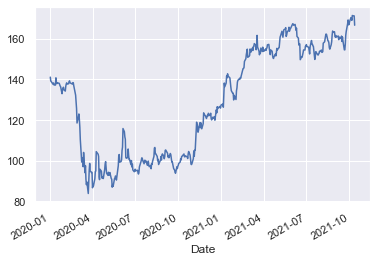

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

vol = jpm['High']
vol.plot()

<AxesSubplot:xlabel='Date'>

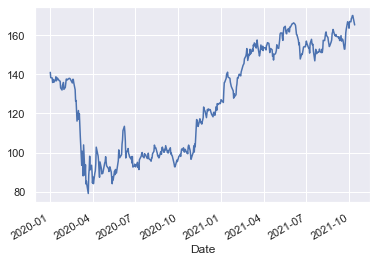

In [79]:
close = jpm['Close']
close.plot()

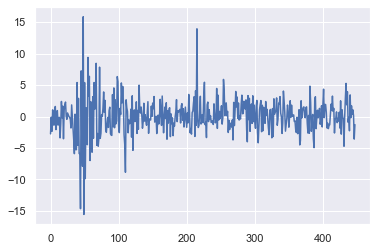

In [80]:
import numpy as np
returns = np.diff(close)
plt.plot(returns)

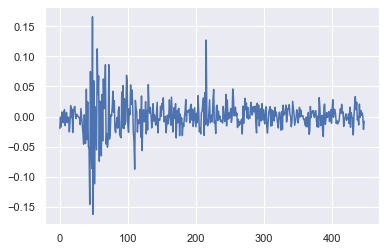

In [81]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [82]:
vol.corr(close)

0.9988681505352383

In [83]:
jpm.to_csv('jpm.csv')

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv('jpm.csv', index_col=['Date'], parse_dates=['Date'])
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,141.100006,139.259995,139.789993,141.089996,10803700.0,132.810699
2020-01-03,139.229996,137.080002,137.500000,138.339996,10386800.0,131.058075
2020-01-06,138.270004,136.500000,136.559998,138.229996,10259000.0,130.953873
2020-01-07,137.860001,135.820007,137.279999,135.880005,10531300.0,128.727585
2020-01-08,137.580002,135.600006,135.699997,136.940002,9695300.0,129.731766
2020-01-09,138.229996,137.039993,138.050003,137.440002,9469000.0,130.205460
2020-01-10,137.250000,135.809998,137.210007,136.070007,10190900.0,128.907562
2020-01-13,137.199997,135.759995,136.190002,137.199997,12355200.0,129.978073
2020-01-14,140.759995,137.690002,137.940002,138.800003,24906000.0,131.493896


## 3. Time Series Exploratory Data Analysis
### a. Is it Stationary?


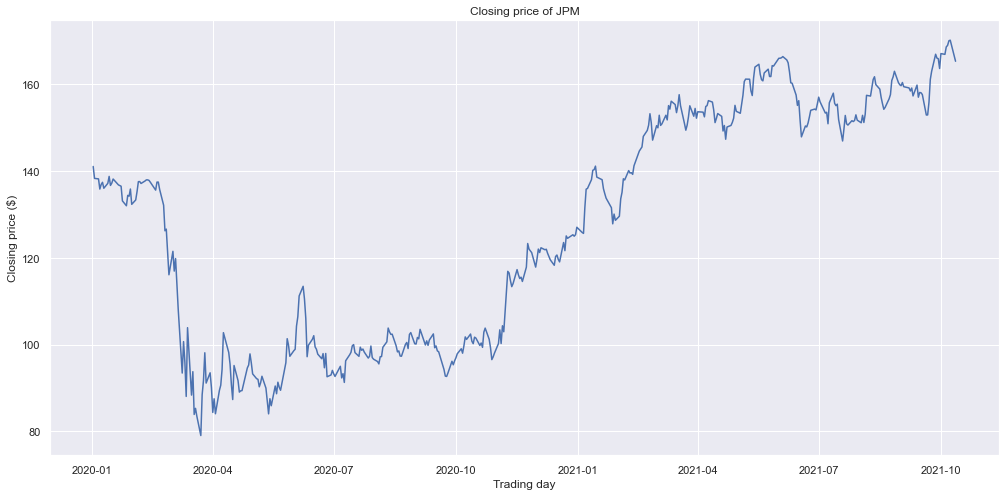

In [85]:
# Plot closing price

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of JPM')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(True)

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some
kind of seasonality.

### b. Moving average


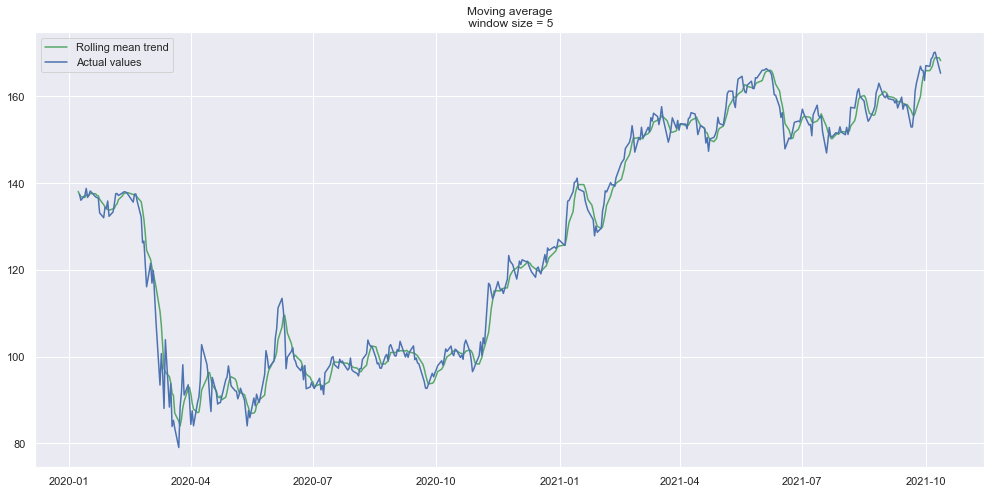

In [86]:
from sklearn.metrics import mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(jpm.Close, 5)

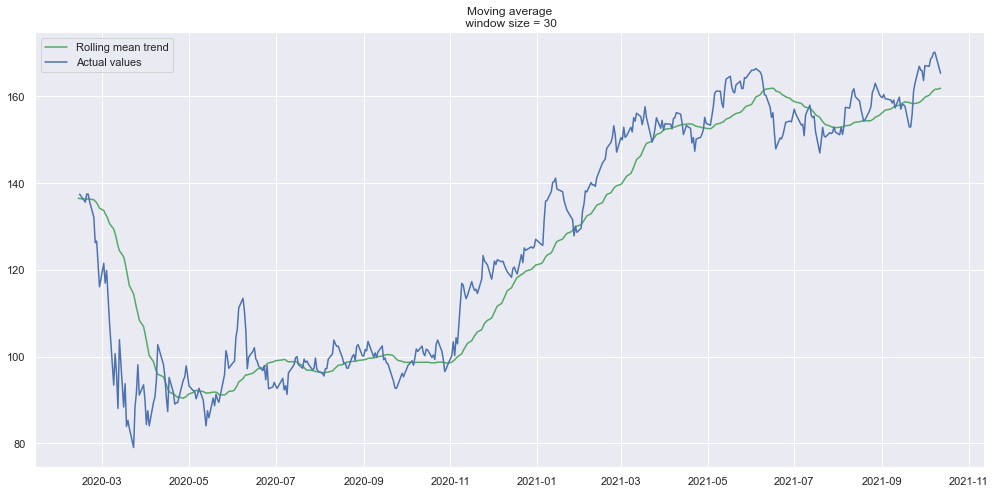

In [87]:
#Smooth by the previous month (30 days)
plot_moving_average(jpm.Close, 30)

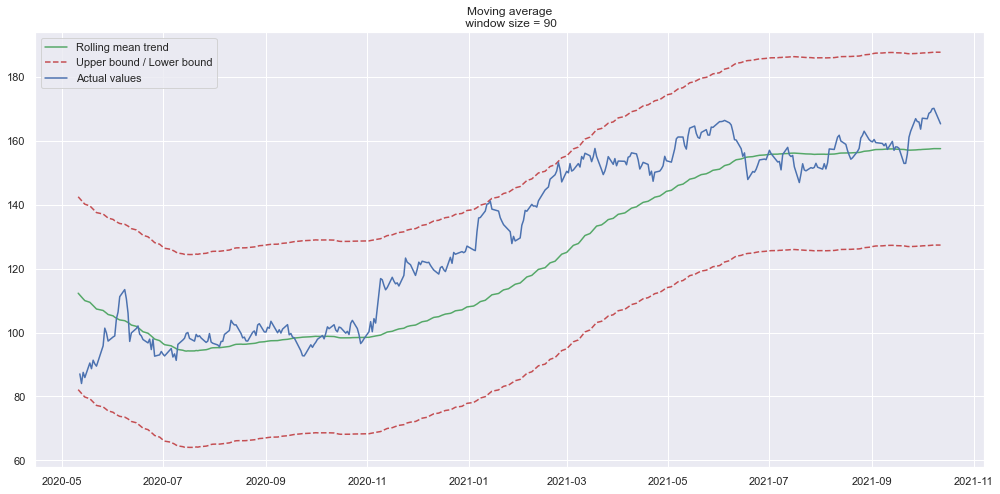

In [88]:
#Smooth by previous quarter (90 days)
plot_moving_average(jpm.Close, 90, plot_intervals=True)

### c.  Exponential Model


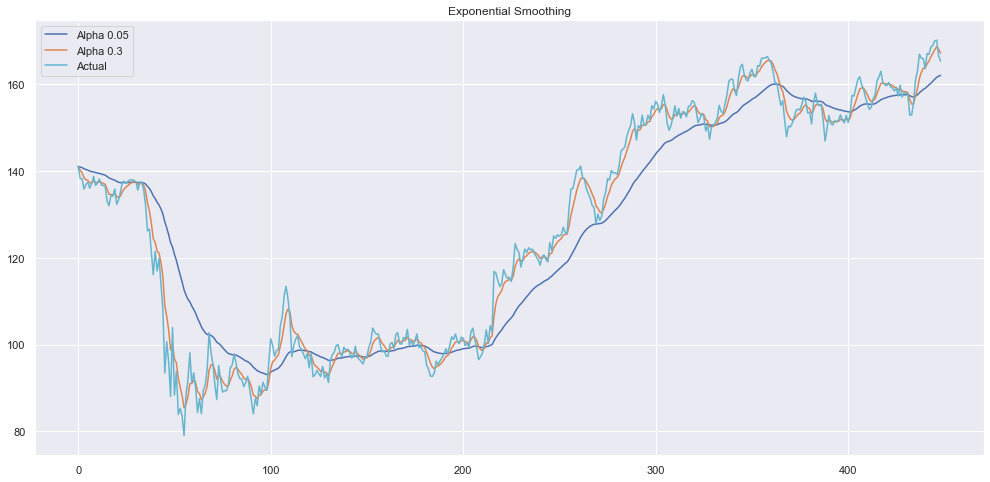

In [89]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(jpm.Close, [0.05, 0.3])

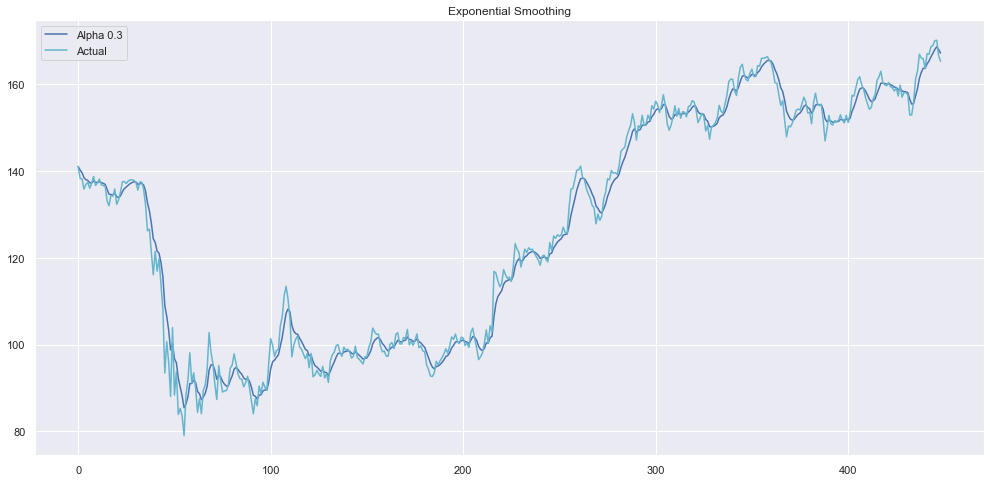

In [90]:
plot_exponential_smoothing(jpm.Close, [0.3])

We must turn our series into a **stationary process** in order to model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process. The Dickey-Fuller test is a point estimate, when it is tiny (say less than 0.01), we can safely say that the time series is stationary. Otherwise, *not*.


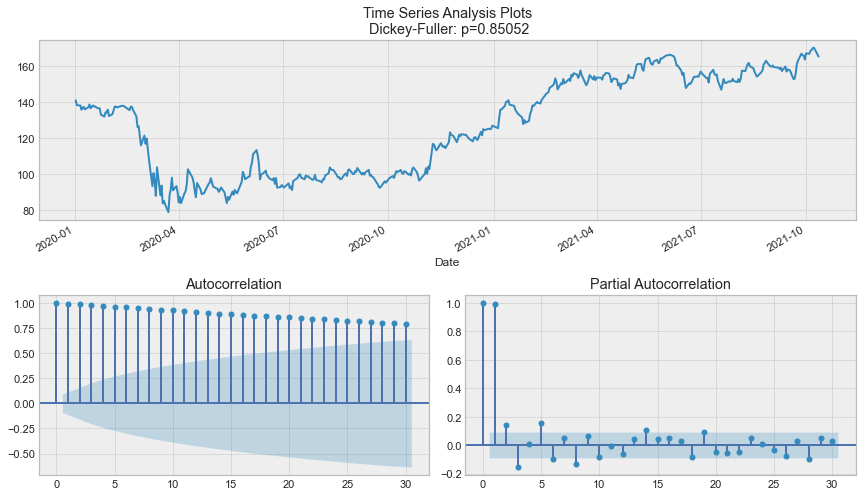

In [91]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(jpm.Close, lags=30)

By the Dickey-Fuller test, the time series is non-stationary. 

Also, looking at the autocorrelation plot, we see that it is very high, and it seems that there is no clear seasonality.

Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference: We simply subtract the time series from itself with a lag of one day, and we get:

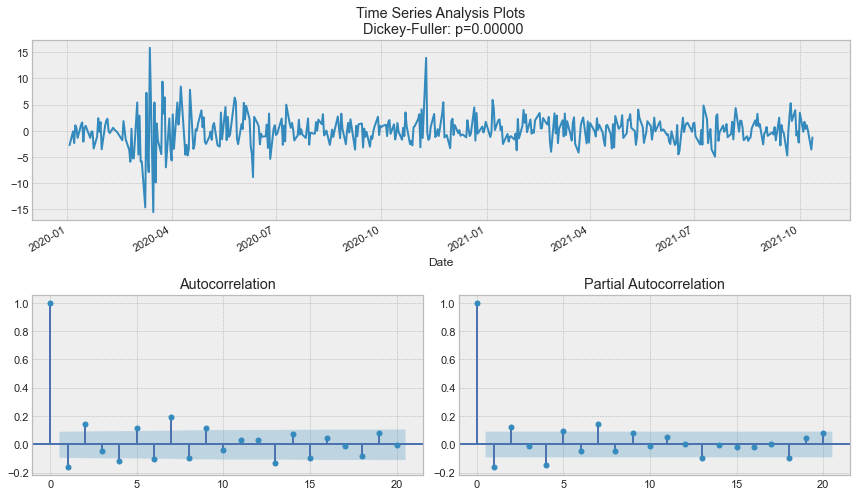

In [92]:
# Take the first difference to remove to make the process stationary
data_diff = jpm.Close - jpm.Close.shift(1)

tsplot(data_diff[1:], lags=20)

Our series is now stationary and we can start modelling!

## 4. Accuracy Predication using- Random Forest Model for JPM

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [94]:
jpm.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [95]:
 # Shift close down to predict next day
pd.concat([jpm.High, jpm.Close.shift(-90)], axis=1)

,High,Close
Date,,
2020-01-02,141.100006,87.029999
2020-01-03,139.229996,84.029999
2020-01-06,138.270004,87.519997
2020-01-07,137.860001,85.900002
2020-01-08,137.580002,90.449997
...,...,...
2021-10-06,169.100006,NaN
2021-10-07,171.509995,NaN
2021-10-08,171.339996,NaN


In [96]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
     return 'Close' not in col
dummy = jpm.dropna()


# we remove the last observation (last row) because there is no tomorrow for the last row to predict!
jpm_X = jpm[[x for x in jpm.columns if valid(x)]].iloc[:-90]

# for the dependent variable, we remove the NA, so that removes the last row, too
jpm_y = jpm.Close.shift(-90).dropna()

In [97]:
jpm_X.T

Date,2020-01-02,2020-01-03,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-13,2020-01-14,2020-01-15,...,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-06-01,2021-06-02,2021-06-03,2021-06-04
High,1.411000e+02,1.392300e+02,1.382700e+02,1.378600e+02,1.375800e+02,1.382300e+02,1.372500e+02,1.372000e+02,1.407600e+02,1.386000e+02,...,1.632200e+02,1.642300e+02,1.657000e+02,1.637400e+02,1.647500e+02,1.649400e+02,1.669100e+02,1.674400e+02,1.672500e+02,1.666700e+02
Low,1.392600e+02,1.370800e+02,1.365000e+02,1.358200e+02,1.356000e+02,1.370400e+02,1.358100e+02,1.357600e+02,1.376900e+02,1.361500e+02,...,1.609400e+02,1.621200e+02,1.615600e+02,1.613100e+02,1.625700e+02,1.632600e+02,1.654800e+02,1.655300e+02,1.646600e+02,1.650300e+02
Open,1.397900e+02,1.375000e+02,1.365600e+02,1.372800e+02,1.357000e+02,1.380500e+02,1.372100e+02,1.361900e+02,1.379400e+02,1.378500e+02,...,1.613400e+02,1.633600e+02,1.638500e+02,1.635700e+02,1.639500e+02,1.646800e+02,1.658700e+02,1.672600e+02,1.654100e+02,1.662100e+02
Volume,1.080370e+07,1.038680e+07,1.025900e+07,1.053130e+07,9.695300e+06,9.469000e+06,1.019090e+07,1.235520e+07,2.490600e+07,1.629340e+07,...,1.024900e+07,9.440300e+06,1.260910e+07,1.305830e+07,1.570750e+07,1.029130e+07,9.445400e+06,1.049860e+07,1.335440e+07,8.510800e+06


In [98]:
jpm_y

Date
2020-01-02     87.029999
2020-01-03     84.029999
2020-01-06     87.519997
2020-01-07     85.900002
2020-01-08     90.449997
                 ...    
2021-05-28    169.020004
2021-06-01    170.089996
2021-06-02    170.220001
2021-06-03    166.639999
2021-06-04    165.360001
Name: Close, Length: 359, dtype: float64

In [99]:
jpm_X_train, jpm_X_test, jpm_y_train, jpm_y_test = train_test_split(jpm_X, jpm_y, random_state=42)

In [100]:
# Create a model 
jpm_rf_model = RandomForestRegressor()

In [101]:
# Train the model
jpm_rf_model.fit(jpm_X_train, jpm_y_train)

RandomForestRegressor()

In [102]:
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
jpm_rf_model.score(jpm_X_test, jpm_y_test)

0.7326314635865551

In [103]:
jpm_y_pred = jpm_rf_model.predict(jpm_X_test)

In [104]:
type(jpm_y_pred)

numpy.ndarray

In [105]:
jpm_y_pred[0:10]

array([151.31709808, 115.46469864, 158.23629898, 159.69950058,
        97.95499992, 162.59250061, 134.75400146,  98.88070122,
       157.86449715, 114.76979958])

In [106]:
jpm_y_test2 = jpm_y_test.values
type(jpm_y_test2)

numpy.ndarray

In [107]:
jpm_y_test2[0:10]

array([153.71000671,  97.65000153, 154.13999939, 150.63999939,
        96.63999939, 160.3999939 , 104.26999664,  96.09999847,
       160.69000244, 104.34999847])

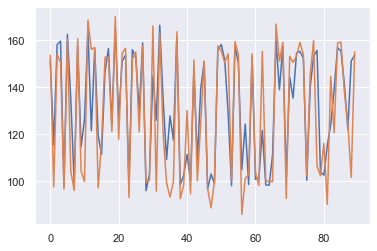

In [108]:
import matplotlib.pyplot as plt
plt.plot(jpm_y_pred)
plt.plot(jpm_y_test2)

In [109]:
pd.concat([pd.Series(jpm_y_pred), jpm_y_test.reset_index(drop=True)], axis=1)

,0,Close
0,151.317098,153.710007
1,115.464699,97.650002
2,158.236299,154.139999
3,159.699501,150.639999
4,97.955000,96.639999
...,...,...
85,155.420001,159.259995
86,141.187901,138.039993
87,122.150399,124.519997
88,151.224497,101.720001


Below we can also view how important is each feature based on the model prediction for feature importance of each column

In [110]:
sorted(zip(jpm_X.columns, jpm_rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Low', 0.3877540473008105),
 ('Volume', 0.25234257864863147),
 ('High', 0.2036479137403314),
 ('Open', 0.15625546031022666)]

# Conclusion for JPM
Since we are targeting to achieve accuracy of more than 70% percent and see how far we can predict the data, we have tried below iterations for JP Morgan stock
- For 30 days advance prediction , we received an score of around 83.05%
- For 90 days advance prediction , we received an score of around 73.26%


After this point, we are observing the predictions are affecting drastically low as we are using data for 1.5 years approx with 449 rows. Ths is due to the stock prices are affected based on the current trends and utlitzing the too old data might not relevant for the current trends in the market due to which stock prices flutuate. 

**So for JPM stock, we were able to predict results of 90 days with accuracy more than 70%**

<h3>So, we can observe that for each stock number of days we can predict the varies based on its historical data. For Tesla we can predict with 150 days with 77% accuracy whereas for GS and JPM its 90 days with 74% and 73% respectively. </h3>